In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
data = pd.read_csv('/Users/shikharghimire/Desktop/TimeSeries-Practice/data/airline_passengers.csv',index_col = 'Month',parse_dates = True)

In [5]:
data.index.freq = 'MS'  #Specifying frequency as MS because every data point starts from the first day of the month

In [6]:
data.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
data.tail() #Data goes upto december 1960

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [9]:
#Let's split the training and testing data
train_data = data.iloc[:109] #training data upto 108 rows. Doesn't include 109
test_data = data.iloc[108:] #After 108 index, put everything as test set

In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [12]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],trend = 'mul',
                                    seasonal = 'mul',seasonal_periods = 12).fit() #periods = 12 because there are 12 entries per seasonal period

In [14]:
test_prediction = fitted_model.forecast(36) #If you want to forecast into 1 year, you use 12 inside the .forecast(), 
                                            #if you want 2 years in, you type 24,  36 for. 3 years


In [17]:
test_prediction #Forecast prediction

1958-02-01    339.142634
1958-03-01    399.274989
1958-04-01    394.218973
1958-05-01    402.533277
1958-06-01    473.136451
1958-07-01    521.811719
1958-08-01    514.548792
1958-09-01    446.242071
1958-10-01    385.443332
1958-11-01    339.653535
1958-12-01    381.452201
1959-01-01    401.214961
1959-02-01    387.155207
1959-03-01    455.800526
1959-04-01    450.028728
1959-05-01    459.520092
1959-06-01    540.118589
1959-07-01    595.684836
1959-08-01    587.393693
1959-09-01    509.416759
1959-10-01    440.010716
1959-11-01    387.738437
1959-12-01    435.454558
1960-01-01    458.015142
1960-02-01    441.964941
1960-03-01    520.328409
1960-04-01    513.739495
1960-05-01    524.574556
1960-06-01    616.583417
1960-07-01    680.016202
1960-08-01    670.551279
1960-09-01    581.535116
1960-10-01    502.303228
1960-11-01    442.630739
1960-12-01    497.102053
1961-01-01    522.856549
Freq: MS, dtype: float64

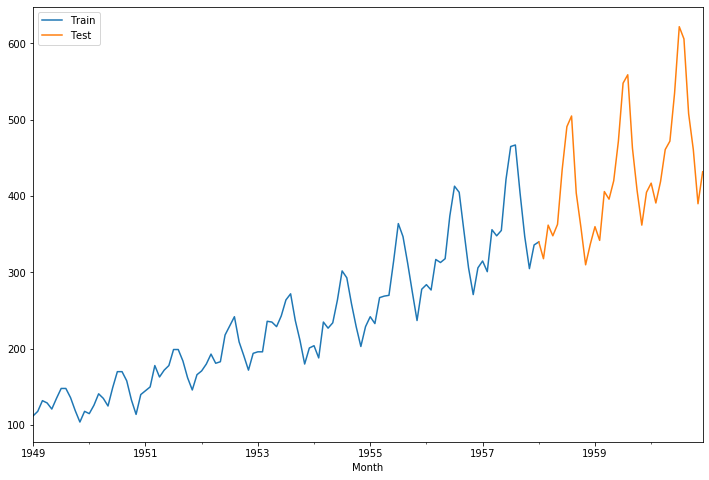

In [22]:
#Let's plot the prediction value with the real values that are stored in the 'test data' variable
train_data['Thousands of Passengers'].plot(legend=True,label='Train',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label='Test',figsize=(12,8))

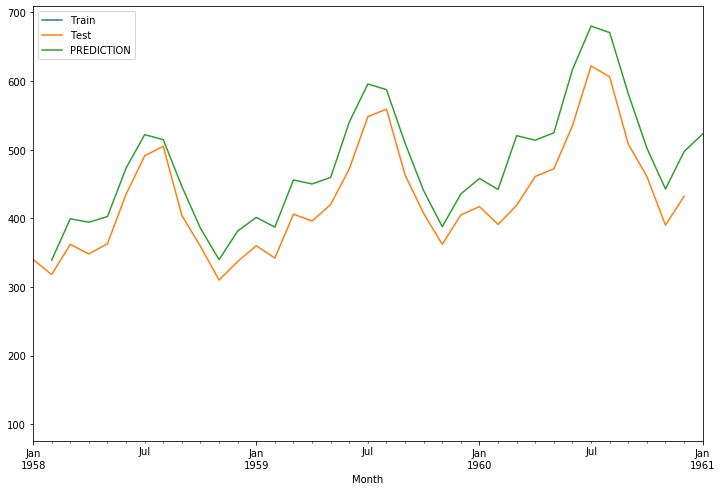

In [25]:
#Let's plot the prediction value with the real values that are stored in the 'test data' variable
train_data['Thousands of Passengers'].plot(legend=True,label='Train',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label='Test',figsize=(12,8))

#Let's see what the real prediction looks like
test_prediction.plot(legend=True,label = 'PREDICTION',xlim = ['1958-01-01','1961-01-01']) #xlim is to see the subset

- In the very next lecture, we are going to talk about the evaluation metric. We can see visually that we are performing well but we need to quanitfy how good it was numerically (Check the notecopy for it)